## Project 1 (Pract) :: World Happiness Report:
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform
from sklearn.metrics import r2_score

In [3]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df1

df=pd.DataFrame(data=df1)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Checking Info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
#if has null value, fill those by imputation
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

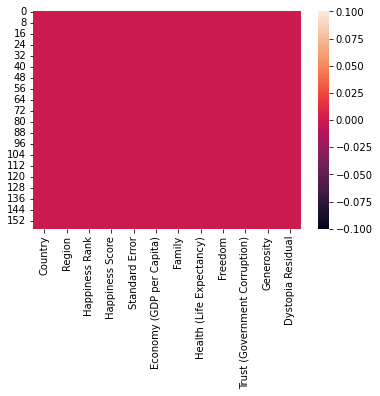

In [6]:
sns.heatmap(df.isnull()) #checking null values with heat map

#### NO NULL VALUES, so let's proceed ahead.

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(158, 12)

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In this dataset,various factors are mentioned on which a country's or region's happiness is dependent, like 'Country', 'Region', 'Happiness Rank', 'Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity' and 'Dystopia Residual'.
- It has 158 rows and 12 columns
- Here the Happiness score can be the target, as the happiness of the country can be known from its happiness score.
        

# Visualization of the data

<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>

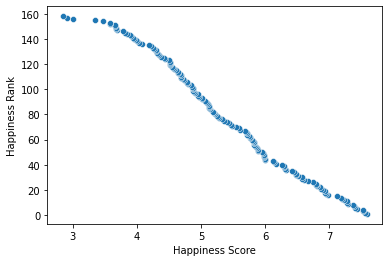

In [10]:
import seaborn as sns
sns.scatterplot(data=df,x='Happiness Score',y='Happiness Rank')

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

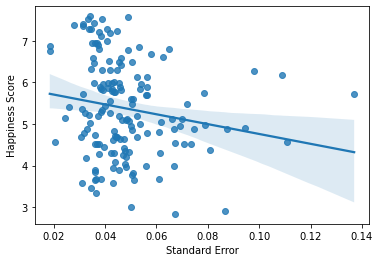

In [11]:
sns.regplot(y='Happiness Score',x='Standard Error', data = df)

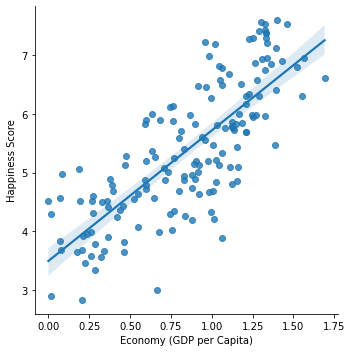

In [12]:
sns.lmplot(y='Happiness Score',x='Economy (GDP per Capita)', data = df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

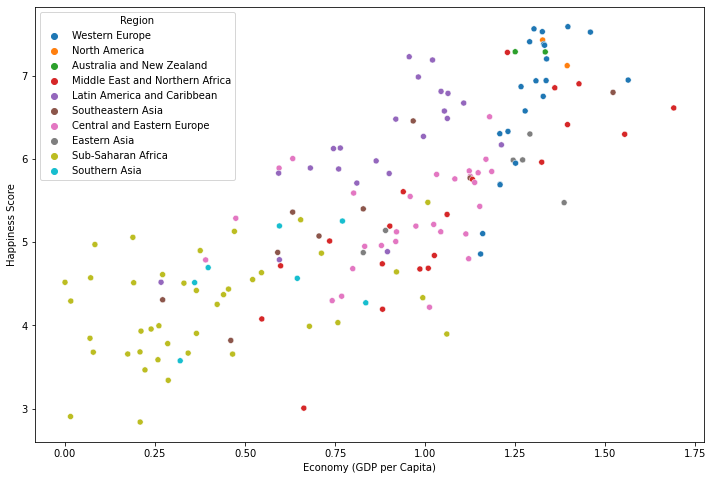

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(y='Happiness Score',x='Economy (GDP per Capita)', hue='Region', data = df)

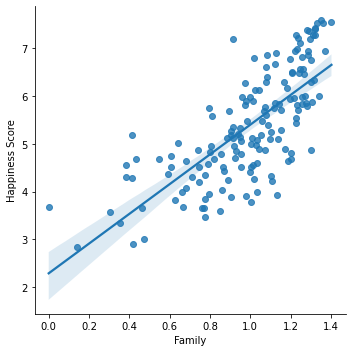

In [14]:
sns.lmplot(y='Happiness Score',x='Family', data = df)

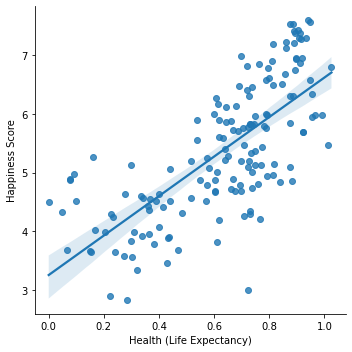

In [15]:
sns.lmplot(y='Happiness Score',x='Health (Life Expectancy)', data = df)

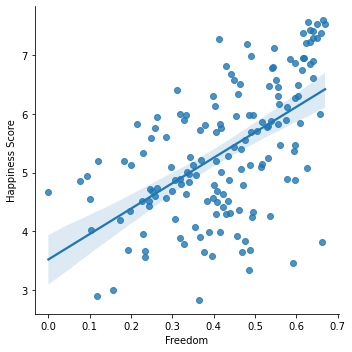

In [16]:
sns.lmplot(y='Happiness Score',x='Freedom', data = df)

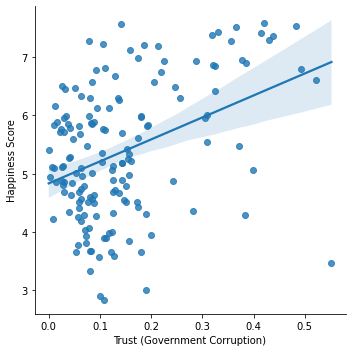

In [17]:
sns.lmplot(y='Happiness Score',x='Trust (Government Corruption)', data = df)

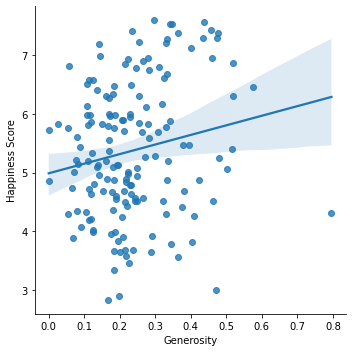

In [18]:
sns.lmplot(y='Happiness Score',x='Generosity', data = df)

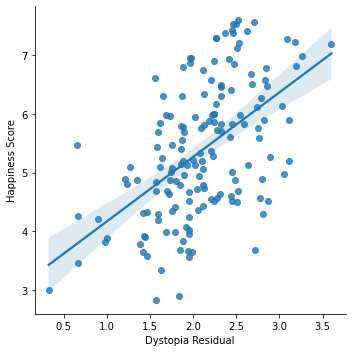

In [19]:
sns.lmplot(y='Happiness Score',x='Dystopia Residual', data = df)

# Encoding Data Frame
Since the "Country" and "Region" are in string, we are converting those in numerical data with label encoder.

In [20]:
le=LabelEncoder() #le is the instance
#df['Country']=le.fit_transform(df['Country'])

list1=['Region','Country']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## EXPLATORY DATA ANALYSIS(EDA)

In [21]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


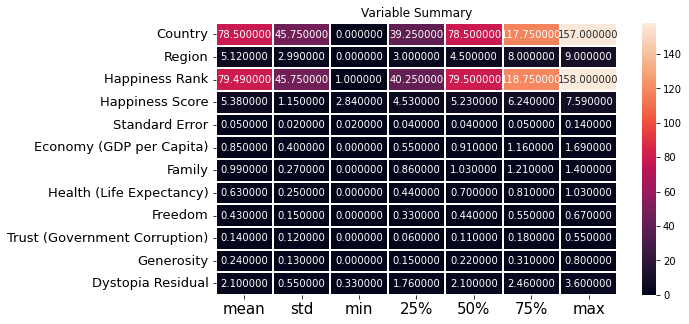

In [22]:
#plotting heat map for better understanding:
plt.figure(figsize=(9,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variable Summary")
plt.show()

### Describing the dataset:

    The difference between :

    1. Min and 25% for Happiness score is almost 1.69
    2. 25% and 50% is 0.71 
    3. 50%-75% is alomst 1
    4. 75% and max is 1.34
- The mean > Median in Region column, which means data is right skewed. 
- Std deviation is high in Country, happiness rank and region. Which means data is highly spread.
- High gap is present between 75% and max of Happiness rank,Country and considerable gap in region, std error,trust, generosity   and dystopia, which means outliers might be present.

## Check Correlation of columns with the target:

In [23]:
df.corr() #correlation 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

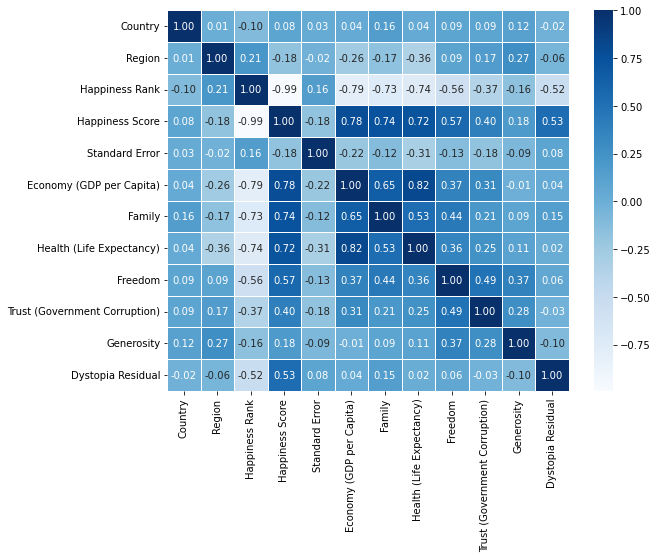

In [24]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidth=0.5,fmt='0.2f')

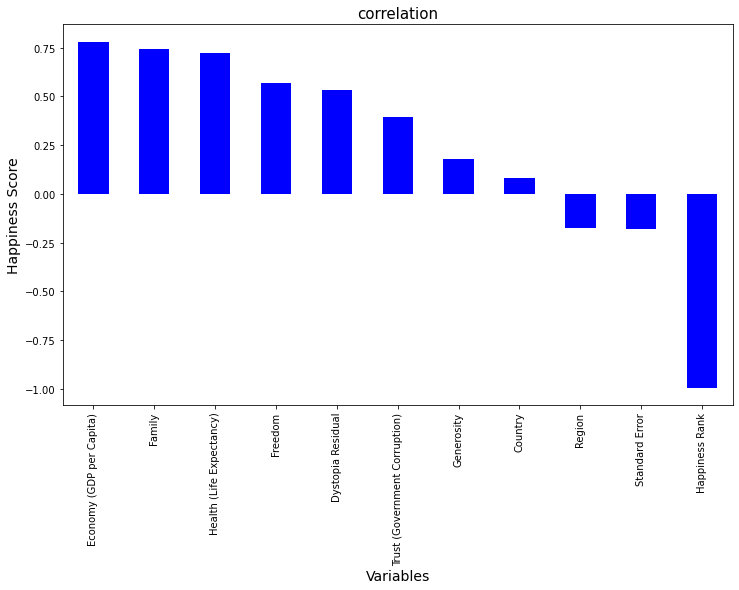

In [25]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(12,7))
df.corr()["Happiness Score"].sort_values(ascending=False).drop(["Happiness Score"]).plot(kind='bar', color='b')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Happiness Score",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()


In [26]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

#### From the heat map it can be seen that the 'Happiness Score' is having maximum positive correlation with following factors:
- Health (Life Expectancy)         0.724200 ==72%
- Family                           0.740605 ==74%
- Economy (GDP per Capita)         0.780966 ==78%

And negative correlation with--
- Happiness Rank                  -0.992105
- Standard Error                  -0.177254
- Region                          -0.176791

# Checking Outliers:

Country                             AxesSubplot(0.125,0.657941;0.133621x0.222059)
Region                           AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Happiness Rank                    AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Happiness Score                  AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Standard Error                   AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Economy (GDP per Capita)            AxesSubplot(0.125,0.391471;0.133621x0.222059)
Family                           AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Health (Life Expectancy)          AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Freedom                          AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Trust (Government Corruption)    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Generosity                             AxesSubplot(0.125,0.125;0.133621x0.222059)
Dystopia Residual                   AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

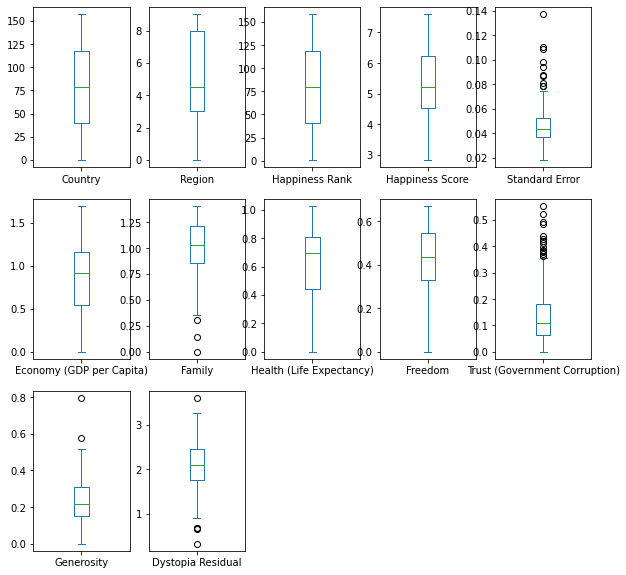

In [27]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

##### Standard Error, Trust (Government Corruption), Dystopia Residual and Generosity shows some out of range data, which might be outliers.

### REMOVING OUTLIERS

In [28]:
#use Zscore technique.
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(158, 12)

In [29]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

#arrays are the index loc where outliers are present

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [30]:
len(np.where(z>3)[0])

9

In [31]:
z.iloc[27]  #At 27th index location outlier is present

Country                          0.800267
Region                           0.375441
Happiness Rank                   1.129016
Happiness Score                  1.082256
Standard Error                   0.859197
Economy (GDP per Capita)         2.101026
Family                           0.322476
Health (Life Expectancy)         0.678336
Freedom                          1.409878
Trust (Government Corruption)    3.164619
Generosity                       0.700286
Dystopia Residual                0.982677
Name: 27, dtype: float64

In [32]:
#Removing the outliers

df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [33]:
print('Old_DF:',df.shape)
print('New_DF:',df_new.shape)
print('total dropped rows:',df.shape[0]-df_new.shape[0])

Old_DF: (158, 12)
New_DF: (149, 12)
total dropped rows: 9


### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [34]:
loss_percent=(158-149)/158*100
print(loss_percent,'%')

5.69620253164557 %


# Check Skewness

In [35]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

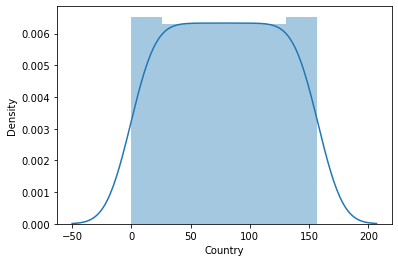

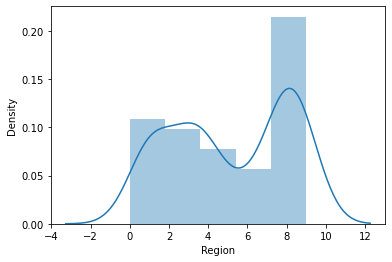

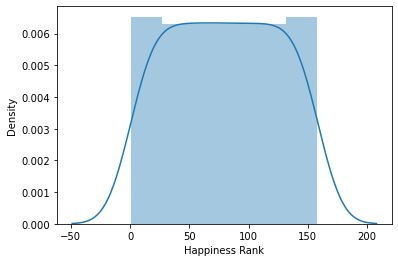

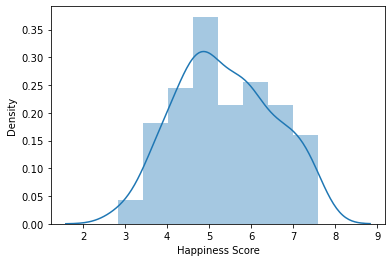

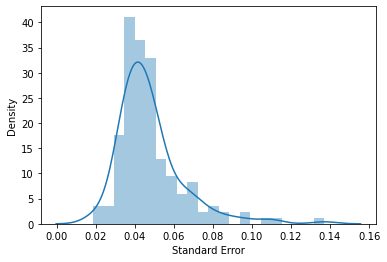

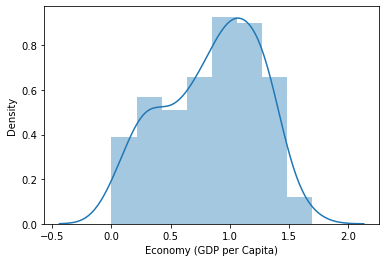

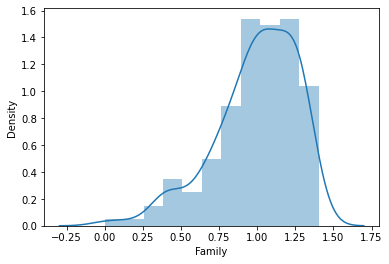

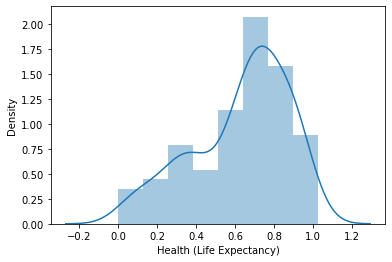

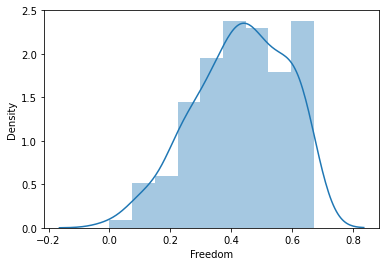

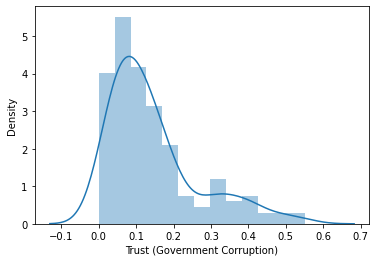

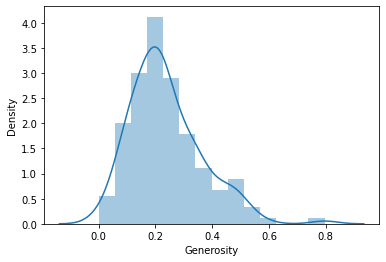

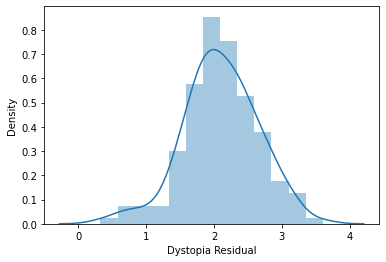

In [36]:
#for checking all columns:

for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Keeping +/- 0.5 as the threshold, Skewness is seen in
- Standard Error
- Family: Left skew
- Health Life Expectancy- little left skewed
- Trust (Government Corruption) - Shows right tail skew
- Generosity

## Removing the skewness
#### transforming data to remove Skewness
Seperating the coulumns in target and features

In [37]:
x=df_new.drop('Happiness Score',axis=1)
y=df_new['Happiness Score']

In [38]:
#removing the skewness from the clomns other than target column

from sklearn.preprocessing import power_transform
df2=power_transform(x,method='yeo-johnson')
df2

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354, -1.99584442, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966,  1.56626337, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  1.60111233, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [39]:
#check if skewness is removed?
pd.DataFrame(df2).skew()

0    -0.267371
1    -0.222589
2    -0.266578
3    -0.031216
4    -0.140644
5    -0.148528
6    -0.190663
7    -0.076489
8     0.174593
9     0.025172
10    0.014748
dtype: float64

## Scaling The Data using Min Max Scaler
### Since the data is continous we will use the linear regression model

In [40]:
from sklearn.preprocessing import MinMaxScaler #import Lin reg,r2score,TestTrainSplit,metrics
mms=MinMaxScaler()
lr=LinearRegression()
x=mms.fit_transform(x)
x

array([[0.85987261, 1.        , 0.        , ..., 0.853038  , 0.51497484,
        0.63201655],
       [0.36942675, 1.        , 0.00641026, ..., 0.28744158, 0.75707097,
        0.69464864],
       [0.23566879, 1.        , 0.01282051, ..., 0.98266612, 0.59238244,
        0.62342046],
       ...,
       [0.        , 0.77777778, 0.97435897, ..., 0.19750051, 0.63352421,
        0.44025646],
       [0.08280255, 0.88888889, 0.98717949, ..., 0.16277179, 0.31684886,
        0.33210306],
       [0.13375796, 0.88888889, 1.        , ..., 0.20447064, 0.34230436,
        0.39986092]])

In [41]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"At random state {i},the training accuracy is:",{r2_score(y_train,pred_train)})
    print(f"At random state {i} the testing accuracy is:",{r2_score(y_test,pred_test)})
    print("\n")

At random state 0,the training accuracy is: {0.9999999448142607}
At random state 0 the testing accuracy is: {0.9999999287889222}


At random state 1,the training accuracy is: {0.999999951399465}
At random state 1 the testing accuracy is: {0.9999999050030984}


At random state 2,the training accuracy is: {0.9999999367166187}
At random state 2 the testing accuracy is: {0.9999999443583133}


At random state 3,the training accuracy is: {0.9999999431538463}
At random state 3 the testing accuracy is: {0.9999999185117979}


At random state 4,the training accuracy is: {0.9999999267504668}
At random state 4 the testing accuracy is: {0.9999999506350227}


At random state 5,the training accuracy is: {0.999999939660016}
At random state 5 the testing accuracy is: {0.9999999371297923}


At random state 6,the training accuracy is: {0.9999999477464687}
At random state 6 the testing accuracy is: {0.9999999146981706}


At random state 7,the training accuracy is: {0.9999999540243273}
At random state 7 th

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=49)

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
pred_test=lr.predict(x_test)

In [45]:
print(r2_score(y_test,pred_test))

0.9999999254914756


# Cross Validation Method

In [46]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for a in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=a)
    cv_mean=cv_score.mean()
    print(f"At cross fold {a}, the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print("\n")

At cross fold 2, the CV score is 0.999999635511221 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 3, the CV score is 0.9999994196935257 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 4, the CV score is 0.999998628402274 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 5, the CV score is 0.9999981468771427 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 6, the CV score is 0.9999971360285217 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 7, the CV score is 0.9999954628022162 and accuracy score for training is -0.8775628051613065 and accuracy score for testing is 0.9999999254914756


At cross fold 8, the CV score 

Since the folds arent having any impact on the accuracy score of training and testing, hence we can select cv=6.
The Underfittinga nd Overfitting has been done in above steps using the R2 Score.

<function matplotlib.pyplot.show(close=None, block=None)>

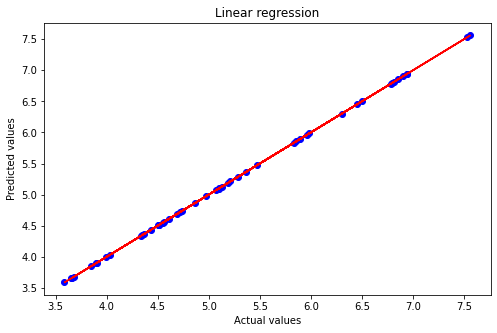

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual values",fontsize=10)
plt.ylabel("Predicted values",fontsize=10)
plt.title("Linear regression")
plt.show

### The best fit line is covering all of the point == model is trained and is a good fit.

## Regularization techniques

In [48]:
from sklearn.linear_model import Lasso, Ridge

ls=Lasso(alpha=0.0001)
#ls=Lasso, alpha is set at 1.0 as default
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predlasso)))

0.9999871654464604
1.1881900472582702e-05
Mean Squared error= 0.0034470132684082757


In [49]:
#try to minimize the coeff variance

rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predridge)))

0.9999999304101396
1.0428328515212182e-07
Mean Squared error= 0.000322929226227856


In [50]:
#Elastic net is the combi of lasso and ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))

print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predridge)))

0.9999555985189241
Mean Squared error= 0.000322929226227856


### From above, since the R2 Score in ridge regression is 0.9999, which is 99.99%, It can be said that the Ridge regression model works best!

## Saving the model

In [51]:
import pickle
filename="World_happiness.pkl"
pickle.dump(lr,open(filename,'wb'))


## Conclusion:

In [52]:
loaded_model=pickle.load(open(filename,'rb'))

result =loaded_model.score(x_test,y_test)
print(result)

0.9999999254914756


#### The model works 99.99%

In [53]:
Conc=pd.DataFrame([loaded_model.predict(x_test)[:],predridge[:]],index=['Predicted','Orginial'])
Conc

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Predicted,5.983613,4.550480,5.192318,3.655126,6.302406,5.097601,6.797642,3.994844,4.971239,7.527087,...,4.514247,4.435526,3.586981,5.073233,5.212108,6.786176,5.889921,4.685489,3.844922,4.609558
Orginial,5.983741,4.550323,5.192426,3.655148,6.302593,5.097618,6.797713,3.994792,4.971217,7.526992,...,4.514104,4.435415,3.587044,5.073276,5.212272,6.786053,5.890053,4.685450,3.844899,4.609420


# END